## Clustering using K-means

The intention of this project is to identify different market segments to later develop a marketing campaign strategy.

In [1]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"C:\Users\Javiera Vines\Documents\Projects\Consumer Insight and Analytics\10-Final Assigment\Survey Results.xlsx")
df.head()

,Satisfact,WOMIntent,Loyalty,BValues_1,BValues_2,BValues_3,BValues_4,BValues_5,BValues_6,BValues_7,...,pers_16,RunFreq,RunDist,RunRace,MoneySpend,%MoneySpendinBrand,PurchLoc,Age,Gender,Income
0,1,1,1,1,1,1,1,1,1,1,...,1,6,6.0,1.0,NaN,NaN,1.0,18.0,1,1.0
1,1,1,1,2,1,2,1,1,3,1,...,1,5,35.0,1.0,300.0,67.0,1.0,21.0,1,1.0
2,1,1,1,1,1,1,1,1,1,1,...,1,7,10.0,1.0,200.0,100.0,1.0,24.0,0,8.0
3,1,1,1,1,2,2,1,1,2,1,...,2,3,5.0,0.0,200.0,50.0,1.0,22.0,0,2.0
4,1,1,1,2,2,2,1,2,2,1,...,2,4,10.0,0.0,100.0,80.0,1.0,23.0,0,2.0


## Data Preparation

In [3]:
#select the variables which we are going to work from the original df
data= pd.concat([pd.DataFrame(df,columns=["Satisfact","WOMIntent","Loyalty","RunFreq","RunDist","RunRace","MoneySpend","%MoneySpendinBrand","PurchLoc","Age","Gender","Income"])],ignore_index=True)
data.head()

,Satisfact,WOMIntent,Loyalty,RunFreq,RunDist,RunRace,MoneySpend,%MoneySpendinBrand,PurchLoc,Age,Gender,Income
0,1,1,1,6,6.0,1.0,NaN,NaN,1.0,18.0,1,1.0
1,1,1,1,5,35.0,1.0,300.0,67.0,1.0,21.0,1,1.0
2,1,1,1,7,10.0,1.0,200.0,100.0,1.0,24.0,0,8.0
3,1,1,1,3,5.0,0.0,200.0,50.0,1.0,22.0,0,2.0
4,1,1,1,4,10.0,0.0,100.0,80.0,1.0,23.0,0,2.0


In [4]:
#Descriptive statistics 
data.describe()

,Satisfact,WOMIntent,Loyalty,RunFreq,RunDist,RunRace,MoneySpend,%MoneySpendinBrand,PurchLoc,Age,Gender,Income
count,2051.000000,2051.000000,2051.000000,2051.000000,1926.000000,2031.000000,1899.000000,1865.000000,2004.000000,2045.000000,2051.000000,2015.000000
mean,2.382253,2.432472,2.591906,3.691370,17.296433,0.447070,165.324550,42.449737,1.418663,27.050367,0.524135,2.405955
std,1.159965,1.194989,1.353483,1.701024,228.891354,0.637908,176.136981,32.200395,0.643622,10.692322,0.499539,2.030787
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000
25%,2.000000,2.000000,2.000000,3.000000,5.000000,0.000000,70.000000,10.000000,1.000000,21.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,4.000000,8.000000,0.000000,120.000000,42.900000,1.000000,23.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,5.000000,15.000000,1.000000,200.000000,70.000000,2.000000,27.000000,1.000000,3.000000
max,7.000000,7.000000,7.000000,12.000000,10000.000000,2.000000,3000.000000,100.000000,3.000000,102.000000,1.000000,8.000000


Here we notice that RunDist have a the max value of 10.000, so there might be someone that missandertood the question (because the Running Distance is measured in km).

For this reason, now I will look closely the column RundDist and find if there is data above 1000 (mtrs) so I change it to km.

In [5]:
data['RunDist'] = data['RunDist'].replace(to_replace=10000, value=10, regex=True)

In [6]:
#Now we can observe that this value has been replace because the max value of running distance changed
data.describe()

,Satisfact,WOMIntent,Loyalty,RunFreq,RunDist,RunRace,MoneySpend,%MoneySpendinBrand,PurchLoc,Age,Gender,Income
count,2051.000000,2051.000000,2051.000000,2051.000000,1926.000000,2031.000000,1899.000000,1865.000000,2004.000000,2045.000000,2051.000000,2015.000000
mean,2.382253,2.432472,2.591906,3.691370,12.109517,0.447070,165.324550,42.449737,1.418663,27.050367,0.524135,2.405955
std,1.159965,1.194989,1.353483,1.701024,24.410193,0.637908,176.136981,32.200395,0.643622,10.692322,0.499539,2.030787
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000
25%,2.000000,2.000000,2.000000,3.000000,5.000000,0.000000,70.000000,10.000000,1.000000,21.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,4.000000,8.000000,0.000000,120.000000,42.900000,1.000000,23.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,5.000000,15.000000,1.000000,200.000000,70.000000,2.000000,27.000000,1.000000,3.000000
max,7.000000,7.000000,7.000000,12.000000,666.000000,2.000000,3000.000000,100.000000,3.000000,102.000000,1.000000,8.000000


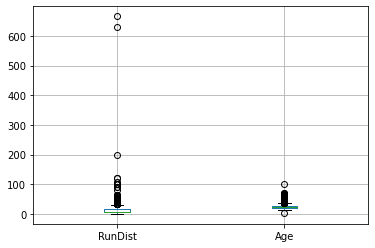

In [7]:
#we want to observe if there are still more outliers in this variable
boxplot = data.boxplot(column=["RunDist","Age"])

In [8]:
#we can see that there are two values very far from the box, so we decided to eliminate them
data = data.drop(data[data.RunDist > 150].index)
#also we eliminate the ouliers from the Age
data = data.drop(data[data.Age > 80].index)

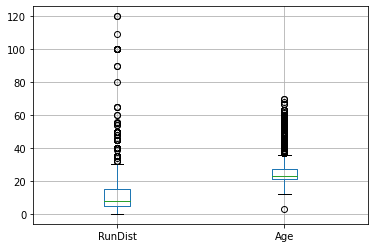

In [9]:
#check again the variables
boxplot = data.boxplot(column=["RunDist","Age"])

In [10]:
#Replace values
#now people that run a race have 1 and people that doesnt will have 0.
data["RunRace"]=data["RunRace"].replace(2,1)

## Missing Values

In [11]:
#find missing values
data.isnull().sum()

Satisfact               0
WOMIntent               0
Loyalty                 0
RunFreq                 0
RunDist               125
RunRace                20
MoneySpend            151
%MoneySpendinBrand    186
PurchLoc               47
Age                     6
Gender                  0
Income                 36
dtype: int64

In [12]:
#drop missing values from specific columns
data.dropna(subset=['Income',"PurchLoc","Age"])

,Satisfact,WOMIntent,Loyalty,RunFreq,RunDist,RunRace,MoneySpend,%MoneySpendinBrand,PurchLoc,Age,Gender,Income
0,1,1,1,6,6.0,1.0,NaN,NaN,1.0,18.0,1,1.0
1,1,1,1,5,35.0,1.0,300.0,67.0,1.0,21.0,1,1.0
2,1,1,1,7,10.0,1.0,200.0,100.0,1.0,24.0,0,8.0
3,1,1,1,3,5.0,0.0,200.0,50.0,1.0,22.0,0,2.0
4,1,1,1,4,10.0,0.0,100.0,80.0,1.0,23.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2045,1,2,1,3,5.0,0.0,50.0,100.0,1.0,27.0,1,3.0
2046,5,5,6,4,15.0,1.0,250.0,30.0,1.0,25.0,1,1.0
2047,7,7,7,1,3.0,1.0,3.0,3.0,1.0,3.0,0,3.0
2049,2,2,2,5,9.0,1.0,60.0,10.0,1.0,21.0,0,1.0


In [13]:
#replace nulls from % of Money Spend in the brand with a zero by assumption
data["%MoneySpendinBrand"]=data["%MoneySpendinBrand"].fillna(0)

In [14]:
#here I will replace the Rest of nulls with the median value (because of outliers again)
data= data.fillna(data.median())
data.head()

,Satisfact,WOMIntent,Loyalty,RunFreq,RunDist,RunRace,MoneySpend,%MoneySpendinBrand,PurchLoc,Age,Gender,Income
0,1,1,1,6,6.0,1.0,120.0,0.0,1.0,18.0,1,1.0
1,1,1,1,5,35.0,1.0,300.0,67.0,1.0,21.0,1,1.0
2,1,1,1,7,10.0,1.0,200.0,100.0,1.0,24.0,0,8.0
3,1,1,1,3,5.0,0.0,200.0,50.0,1.0,22.0,0,2.0
4,1,1,1,4,10.0,0.0,100.0,80.0,1.0,23.0,0,2.0


In [15]:
#Now we observe the Descriptive Statistics again but with the changes done
data.describe()

,Satisfact,WOMIntent,Loyalty,RunFreq,RunDist,RunRace,MoneySpend,%MoneySpendinBrand,PurchLoc,Age,Gender,Income
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,2.378418,2.428223,2.587891,3.687500,11.145474,0.363281,161.851230,38.574101,1.408203,27.000977,0.523926,2.376465
std,1.155207,1.189731,1.349552,1.692248,12.132881,0.481062,169.848951,33.030936,0.638583,10.556661,0.499549,2.017358
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000
25%,2.000000,2.000000,2.000000,3.000000,5.000000,0.000000,75.000000,3.000000,1.000000,21.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,4.000000,8.000000,0.000000,120.000000,37.500000,1.000000,23.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,5.000000,13.000000,1.000000,200.000000,60.000000,2.000000,27.000000,1.000000,3.000000
max,7.000000,7.000000,7.000000,12.000000,120.000000,1.000000,3000.000000,100.000000,3.000000,70.000000,1.000000,8.000000


To give equal importance to all features, we need to scale the continuous features. We will be using scikit-learn’s MinMaxScaler as the feature matrix is a mix of binary and continuous features. Other alternatives includes StandardScaler.

## Clustering

In [16]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre

In [17]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

As k increases, the sum of squared distance tends to zero. Imagine we set k to its maximum value n (where n is number of samples) each sample will form its own cluster meaning sum of squared distances equals zero.

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

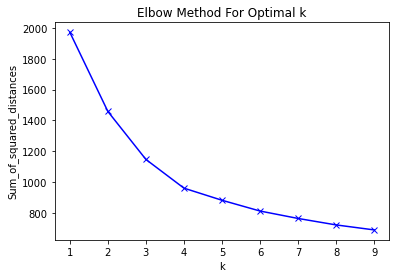

In [18]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the plot we observed that the optimal k is equals to 4

In [19]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(data_transformed)
labels = k_means.labels_
print(labels)

[3 3 2 ... 2 2 3]


In [20]:
#We assign the labels to each row in dataframe.
data["Cluster"] = labels

#replace name of Cluster name as 0
data["Cluster"]=data["Cluster"].replace(0,4)

In [21]:
#We can easily check the centroid values by averaging the features in each cluster.
data.groupby('Cluster').mean()

,Satisfact,WOMIntent,Loyalty,RunFreq,RunDist,RunRace,MoneySpend,%MoneySpendinBrand,PurchLoc,Age,Gender,Income
Cluster,,,,,,,,,,,,
1,2.481146,2.583710,2.788839,3.241327,8.245701,0.0,126.561086,36.091554,1.467572,26.250377,1.0,2.312217
2,2.122754,2.092814,2.203593,4.491018,15.092216,1.0,221.826347,43.751497,1.320359,27.718563,0.0,2.380240
3,2.226829,2.236585,2.387805,4.600000,18.139585,1.0,231.164195,44.113314,1.360976,28.868293,1.0,3.126829
4,2.502340,2.564743,2.708268,3.146646,7.614665,0.0,122.767551,34.901092,1.422777,26.209048,0.0,1.960998


Seems from the table above that the Clusterization is done by RunRaces and Gender, where there are Males and Females who Participate in Running Races or don't.

In general, we undestand that people who Run Races spend more money in sports clothes and implements (MoneySpend), and in average, they are also willing to spend a higher percentage of this money in brand products in average.

## Export Results

In [22]:
#We export to a csv file
data.to_csv('Clustering_UA.csv')

Finally, we export the results so we can have a closer look to the data and analyse the relationship of the variables using Tableau.

Check my visualizations here: https://public.tableau.com/profile/javiera.vines#!/vizhome/ClusteringAnalysis_15912894366620/Clustergralinfo